In [1]:
import pandas as pd

In [3]:
config_id = 4

model_results = pd.read_excel(f'best_models_results_{config_id}.xlsx')
model_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   T                180 non-null    int64  
 1   window_size      180 non-null    int64  
 2   hidden_dim       180 non-null    int64  
 3   num_layers       180 non-null    int64  
 4   best_val_loss    180 non-null    float64
 5   best_model_path  180 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.6+ KB


In [4]:
# 按照 best_val_loss 进行排序
model_results.sort_values(by='best_val_loss', inplace=True)
model_results.reset_index(drop=True, inplace=True)
model_results.head(10)

,T,window_size,hidden_dim,num_layers,best_val_loss,best_model_path
0,30,60,30,5,0.000002,lstm_models_4\best_lstm_model_T30_window60_hid...
1,30,60,30,3,0.000002,lstm_models_4\best_lstm_model_T30_window60_hid...
2,30,40,70,5,0.000002,lstm_models_4\best_lstm_model_T30_window40_hid...
3,30,40,50,3,0.000002,lstm_models_4\best_lstm_model_T30_window40_hid...
4,30,40,50,9,0.000002,lstm_models_4\best_lstm_model_T30_window40_hid...
5,30,20,70,9,0.000002,lstm_models_4\best_lstm_model_T30_window20_hid...
6,30,40,30,9,0.000002,lstm_models_4\best_lstm_model_T30_window40_hid...
7,30,40,50,5,0.000003,lstm_models_4\best_lstm_model_T30_window40_hid...
8,30,120,50,3,0.000003,lstm_models_4\best_lstm_model_T30_window120_hi...
9,30,60,70,3,0.000003,lstm_models_4\best_lstm_model_T30_window60_hid...


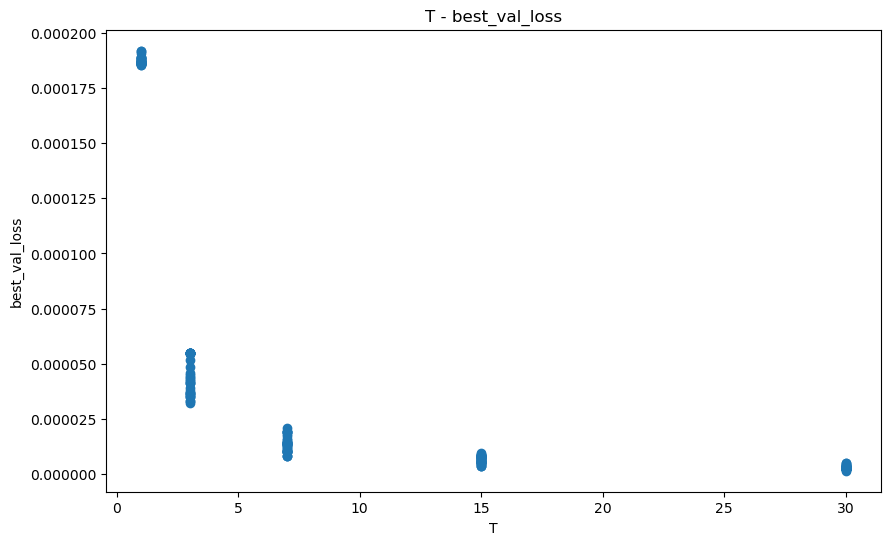

In [5]:
# 可视化分析T与best_val_loss的关系
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model_results['T'], model_results['best_val_loss'], 'o')
plt.xlabel('T')
plt.ylabel('best_val_loss')
plt.title('T - best_val_loss')
plt.show()

In [6]:
from data.get_data import get_common_data

data = get_common_data('SHSE.510300', '2008-01-01', '2020-01-01', 1)

# 计算data最后一列的均值
data['avg_daily_return_1'].mean()

# 计算方差
data['avg_daily_return_1'].var()

0.0002474129546168351

## NMSE计算，可视化T - NMSE

In [7]:
model_results['best_valLoss%var'] = model_results['best_val_loss'] / data['avg_daily_return_1'].var()

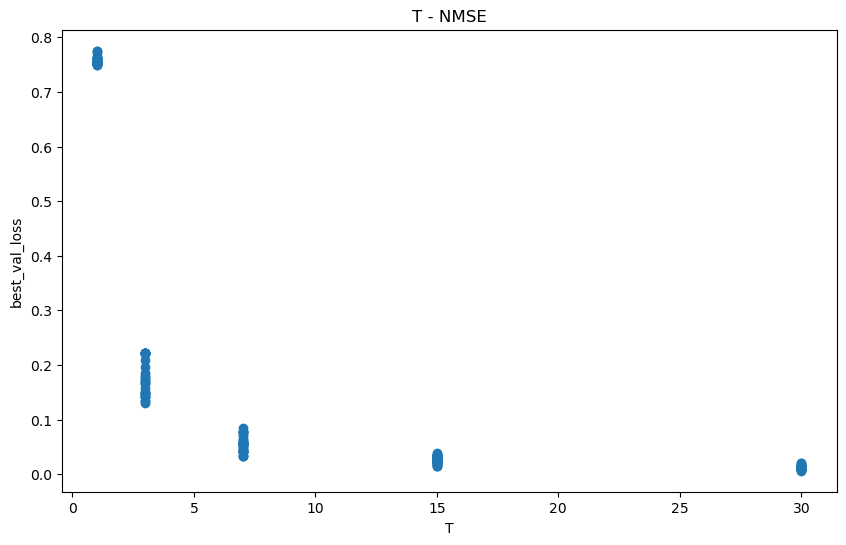

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(model_results['T'], model_results['best_valLoss%var'], 'o')
plt.xlabel('T')
plt.ylabel('best_val_loss')
plt.title('T - NMSE')
plt.show()

In [ ]:
## 查看NMSE最小的模型们对应的超参数

In [30]:
# 按照best_valLoss%var进行排序
model_results.sort_values(by='best_valLoss%var', inplace=True)
model_results.reset_index(drop=True, inplace=True)
model_results

,T,window_size,hidden_dim,num_layers,best_val_loss,best_model_path,best_valLoss%var
0,1,20,30,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
1,1,40,30,9,0.00000000,lstm_models_1\best_lstm_model_T1_window40_hidd...,0.00000000
2,1,20,30,5,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
3,1,20,30,9,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
4,1,20,50,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
...,...,...,...,...,...,...,...
175,7,120,50,5,0.00000651,lstm_models_1\best_lstm_model_T7_window120_hid...,0.02629530
176,7,120,70,3,0.00000735,lstm_models_1\best_lstm_model_T7_window120_hid...,0.02971491
177,7,120,70,5,0.00000759,lstm_models_1\best_lstm_model_T7_window120_hid...,0.03067944
178,7,120,50,9,0.00001468,lstm_models_1\best_lstm_model_T7_window120_hid...,0.05932296


In [31]:
# 查看每个T对应的NMSE最小的模型
model_results.groupby('T').first()

,window_size,hidden_dim,num_layers,best_val_loss,best_model_path,best_valLoss%var
T,,,,,,
1,20,30,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
3,40,50,5,0.00000000,lstm_models_1\best_lstm_model_T3_window40_hidd...,0.00000000
7,40,70,9,0.00000000,lstm_models_1\best_lstm_model_T7_window40_hidd...,0.00000000
15,120,50,5,0.00000185,lstm_models_1\best_lstm_model_T15_window120_hi...,0.00748087
30,120,30,3,0.00000110,lstm_models_1\best_lstm_model_T30_window120_hi...,0.00445722


# T与threshold调参结果分析

In [34]:
config_id = 'test'
data = pd.read_excel(f'optimization_results_{config_id}.xlsx')
data

,0
0,"{'params': {'T': 1, 'threshold': 0.001}, 'pnl_..."
1,"{'params': {'T': 3, 'threshold': 0.001}, 'pnl_..."
2,"{'params': {'T': 7, 'threshold': 0.001}, 'pnl_..."
3,"{'params': {'T': 15, 'threshold': 0.001}, 'pnl..."
4,"{'params': {'T': 30, 'threshold': 0.001}, 'pnl..."


In [35]:
import ast

# 将字符串转换为字典
dict_data = ast.literal_eval(data.iloc[0,0])

# 获取字典的所有键
keys = list(dict_data.keys())
df = pd.DataFrame(columns=keys)
for i in range(len(data)):
    # 将当前行的字符串转换为字典
    row_data = ast.literal_eval(data.iloc[i, 0])
    # 创建一个临时的DataFrame存储当前行的数据
    temp_df = pd.DataFrame([row_data])
    # 使用concat方法合并DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)
# df.to_excel('optimization_results.xlsx', index=False)
df

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual
0,"{'T': 1, 'threshold': 0.001}",0.00059924,0.00731819,0.06787240,0.00081918
1,"{'T': 3, 'threshold': 0.001}",-0.00659253,-0.08098832,0.06774807,-0.00901226
2,"{'T': 7, 'threshold': 0.001}",0.01654890,0.20628444,0.06732217,0.02262303
3,"{'T': 15, 'threshold': 0.001}",0.01047426,0.12790213,0.06281359,0.01431875
4,"{'T': 30, 'threshold': 0.001}",-0.00503190,-0.06212990,0.06525104,-0.00687882


# 行情数据分析

In [1]:
from __future__ import print_function, absolute_import
from gm.api import *

# 设置token
set_token('9c0950e38c59552734328ad13ad93b6cc44ee271')
symbol = 'SHSE.510300'
trade_data = history(symbol, frequency='1d', start_time='2006-01-01', end_time='2024-04-01', fill_missing='last',
                     df=True)
# 去除 'symbol', 'eob', 'frequency','position' 列
trade_data.drop(['symbol', 'eob', 'frequency', 'position'], axis=1, inplace=True)
# 将'bob'去时区化后作为索引
trade_data.set_index('bob', inplace=True)
# 将data的索引设置为tz-naive
trade_data.index = trade_data.index.tz_localize(None)

In [2]:
trade_data

,open,high,low,close,volume,amount,pre_close
bob,,,,,,,
2012-05-28,2.551,2.607,2.544,2.604,1277518769,3285755320.0,2.574
2012-05-29,2.602,2.661,2.602,2.644,714949008,1875593354.0,2.604
2012-05-30,2.642,2.647,2.633,2.636,265887198,701725789.0,2.644
2012-05-31,2.621,2.645,2.613,2.630,178155984,468193104.0,2.636
2012-06-01,2.629,2.660,2.620,2.630,179350035,473477195.0,2.630
...,...,...,...,...,...,...,...
2024-03-26,3.520,3.538,3.512,3.531,879103283,3098650769.0,3.520
2024-03-27,3.526,3.532,3.492,3.493,874647452,3074186800.0,3.531
2024-03-28,3.491,3.544,3.481,3.510,1031925094,3626832966.0,3.493


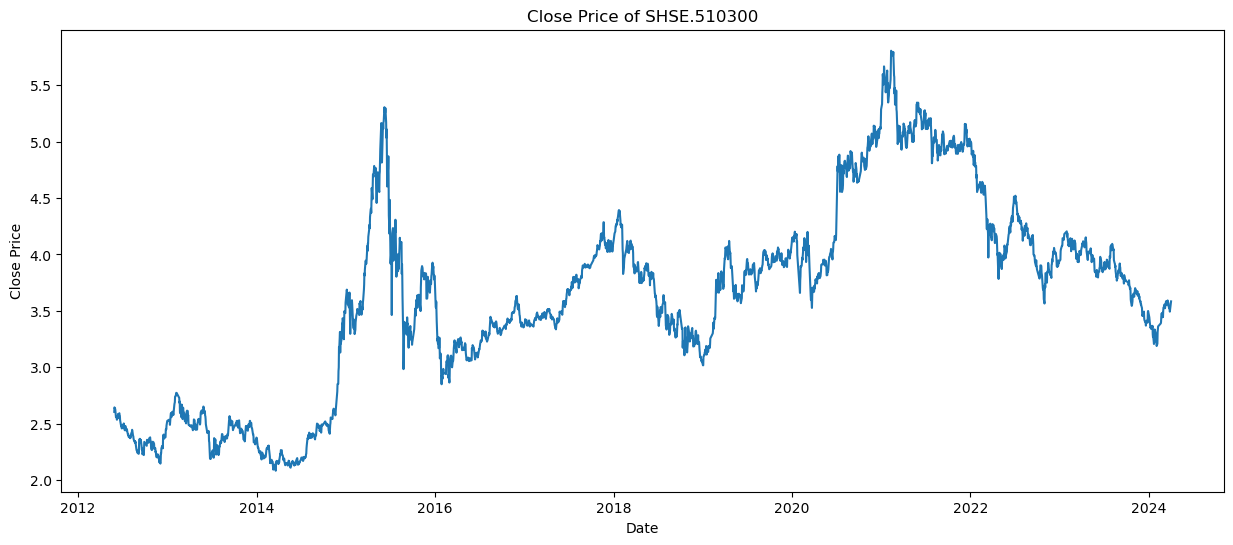

In [7]:
import pandas as pd
# 可视化trade_data.close
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(trade_data['close'])
# # 横坐标刻度包含月
# plt.xticks(pd.date_range(trade_data.index[0], trade_data.index[-1], freq='M'), rotation=45)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price of SHSE.510300')
plt.show()